<a href="https://colab.research.google.com/github/yuanic/AutoML-Flower-Classifier/blob/master/NLP%20with%20GCP%20%26%20AWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Set Up

### 1.1 Installing textblob



In [0]:
!pip -q install -U textblob

### 1.2 Connecting to Google Drive

Additional steps to connect to Google & AWS API are found in their respective sections.

In [0]:
## mount google drive to allow access to credentials saved
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## 2. Getting Data from CNBC

### 2.1 Making a Pandas DataFrame from scratch

In [0]:
import pandas as pd
from textblob import TextBlob
import urllib.request
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
## get data from url
target_url="https://www.cnbc.com/2019/01/09/government-shutdown-tsa-officers-set-to-miss-a-paycheck-this-friday.html"
page = urllib.request.urlopen(target_url) #For python 3 use urllib.request.urlopen(target_url)
soup = BeautifulSoup(page)
#paras = soup.find_all("div", {"itemprop":"articleBody"})[1].find_all("p")
paras0 = soup.find_all("div", attrs={"itemprop" : "articleBody"})[0].find_all("p")
paras1 = soup.find_all("div", attrs={"itemprop" : "articleBody"})[1].find_all("p")

content0 = " ".join([para.getText() for para in paras0])
content1 = " ".join([para.getText() for para in paras1])
content= content0+content1
content

'Transportation Security Administration screeners at U.S. airports are facing their first missed paychecks as an impasse between President Donald Trump and lawmakers over funding for a new barrier at the U.S. border extends what is already one of the longest-ever government shutdowns. On Wednesday, talks broke down between Trump, House Speaker Nancy Pelosi and Senate Minority Leader Chuck Schumer. Trump called the meeting "a total waste of time." The some 51,000 TSA officers have been working without an idea of when their next paycheck would arrive since the shutdown began Dec. 22. Airport representatives and air traffic controllers are fretting about the prolonged closure. "Federal staffing and other resource shortfalls brought on by this shutdown threaten existing and new air service to communities across the country, harming air travelers, businesses, and regional economies all over America," the Airports Council International trade group wrote in Jan. 8 letter to Trump, Pelosi and 

In [0]:
## get data from url
target_url="https://www.cnbc.com/2019/01/10/beijing-issues-statement-on-us-china-trade-talks.html"
page = urllib.request.urlopen(target_url) #For python 3 use urllib.request.urlopen(target_url)
soup = BeautifulSoup(page)
paras0 = soup.find_all("div", attrs={"itemprop" : "articleBody"})[0].find_all("p")
paras1 = soup.find_all("div", attrs={"itemprop" : "articleBody"})[1].find_all("p")

content0 = " ".join([para.getText() for para in paras0])
content1 = " ".join([para.getText() for para in paras1])
content= content0+content1
content

## format content into seperate sentences; store in seperate rows in a  dataframe
content_sentence = TextBlob(content).sentences
df = []
for sentence in content_sentence:
  text = str(sentence)
  text_len = len(text)
  df.append(text)

df = pd.DataFrame(df)
df.columns=['sentence']
pd.set_option('display.max_colwidth', -1)
df

,sentence
0,"In a Thursday morning statement, China's Commerce Ministry said the just-concluded round of trade talks with the U.S. were extensive and established a foundation for the resolution of each others' concerns."
1,"Both parties, the Beijing ministry said, agreed to maintain close contact."
2,"Here's the full three-sentence statement, as translated from Chinese by CNBC: From Jan. 7 to 9, China and the U.S. held discussions in Beijing at a vice-ministerial level over the issue of trade."
3,"Both sides enthusiastically implemented the important agreement of the heads of both countries, and held broad, deep and meticulous discussions on shared observations on trade issues and structural problems, laying the foundation for addressing areas of common concern."
4,Both sides agreed to continue to keep in close contact.
5,"The U.S. side had issued its own statement earlier in the day, noting a long list of outstanding issues, but also recognizing that China had pledged to purchase ""a substantial amount of agricultural, energy, manufactured goods, and other products and services from the United States."
6,"""The talks lasted for three days in Beijing — one day longer than had been previously announced, which analysts said indicated the discussions were making some progress."
7,"Gao Feng, a spokesman for China's Commerce Ministry, said Thursday afternoon that the length of the meeting indicated that both sides were serious and honest."
8,He added that the structural issues that made progress during the talks included forced tech transfers and the protection of intellectual property rights.
9,"Another signal that experts cheered: China's top trade negotiator Liu He reportedly stopped by the negotiating room on Monday, which was unexpected given that the talks were just meant to be held at the vice-ministerial level."


In [0]:
content_sentence

[Sentence("In a Thursday morning statement, China's Commerce Ministry said the just-concluded round of trade talks with the U.S. were extensive and established a foundation for the resolution of each others' concerns."),
 Sentence("Both parties, the Beijing ministry said, agreed to maintain close contact."),
 Sentence("Here's the full three-sentence statement, as translated from Chinese by CNBC: From Jan. 7 to 9, China and the U.S. held discussions in Beijing at a vice-ministerial level over the issue of trade."),
 Sentence("Both sides enthusiastically implemented the important agreement of the heads of both countries, and held broad, deep and meticulous discussions on shared observations on trade issues and structural problems, laying the foundation for addressing areas of common concern."),
 Sentence("Both sides agreed to continue to keep in close contact."),
 Sentence("The U.S. side had issued its own statement earlier in the day, noting a long list of outstanding issues, but also r

### 2.2 Creating an Apply function
Creating an apply function makes it easy to apply the function to multiple bodies of text without repeating code. In this exercise, we will be scoring the sentiment of each individual sentence. Apply function will enable us to do so down the pandas dataframe.

In [0]:
## exclude scoring from sentences with '"' as they represent a reported statement and should not be judged.
def score_polarity(sentence):
  if '"' not in sentence: 
    analyze_sentence = TextBlob(sentence)
    sentiment_score = analyze_sentence.sentiment
    return sentiment_score.polarity

def score_subjectivity(sentence):
  if '"' not in sentence: 
    analyze_sentence = TextBlob(sentence)
    sentiment_score = analyze_sentence.sentiment
    return sentiment_score.subjectivity


In [0]:
df["Polarity"] = df["sentence"].apply(score_polarity)
df["Subjectivity"] = df["sentence"].apply(score_subjectivity)
pd.set_option('display.max_colwidth', -1)
df.head()

,sentence,Polarity,Subjectivity
0,"In a Thursday morning statement, China's Commerce Ministry said the just-concluded round of trade talks with the U.S. were extensive and established a foundation for the resolution of each others' concerns.",-0.100000,0.366667
1,"Both parties, the Beijing ministry said, agreed to maintain close contact.",0.000000,0.000000
2,"Here's the full three-sentence statement, as translated from Chinese by CNBC: From Jan. 7 to 9, China and the U.S. held discussions in Beijing at a vice-ministerial level over the issue of trade.",0.175000,0.275000
3,"Both sides enthusiastically implemented the important agreement of the heads of both countries, and held broad, deep and meticulous discussions on shared observations on trade issues and structural problems, laying the foundation for addressing areas of common concern.",0.040625,0.553125
4,Both sides agreed to continue to keep in close contact.,0.000000,0.000000


In [0]:
df["Polarity"].mean() ## Use the mean score as the overall score for the article

0.06421130952380952

In [0]:
df["Subjectivity"].mean() ## Use the mean score as the overall score for the article

0.26986607142857144

## 3. Textblop


### 3.1 Comparing 2 articles with Textblop

Using the final score() function, a reader can immediately get an idea of the polarity and subjectiveness of the article. 2 articles were tested below. 

*Article 1*: China Trade Talks

*Article 2*: Impact of GOvernemnet Shutdown on TSA

*   Article 1 is more positive than Article 2
*   Article 1 is less subjective than Article 2

In [0]:
def score(target_url):
  ## get data from url
  page = urllib.request.urlopen(target_url)
  soup = BeautifulSoup(page)
  paras0 = soup.find_all("div", attrs={"itemprop" : "articleBody"})[0].find_all("p")
  paras1 = soup.find_all("div", attrs={"itemprop" : "articleBody"})[1].find_all("p")

  content0 = " ".join([para.getText() for para in paras0])
  content1 = " ".join([para.getText() for para in paras1])
  content= content0+content1
  content

  content_sentence = TextBlob(content).sentences
  
  ## split content into sentences and store each in a row in a dataframe
  df = []
  for sentence in content_sentence:
    text = str(sentence)
    text_len = len(text)
    df.append(text)

  df = pd.DataFrame(df)
  df.columns=['sentence']
  
  ## exclude scoring from sentences with '"' as they represent a reported statement and should not be judged.
  def score_polarity(sentence):
    if '"' not in sentence: 
      analyze_sentence = TextBlob(sentence)
      sentiment_score = analyze_sentence.sentiment
      return sentiment_score.polarity

  def score_subjectivity(sentence):
    if '"' not in sentence: 
      analyze_sentence = TextBlob(sentence)
      sentiment_score = analyze_sentence.sentiment
      return sentiment_score.subjectivity
  
  ## apply scoring functions
  df["Polarity"] = df["sentence"].apply(score_polarity)
  polarity_mean = df["Polarity"].mean()
  
  ## apply scoring functions
  df["Subjectivity"] = df["sentence"].apply(score_subjectivity)
  subjectivity_mean = df["Subjectivity"].mean()
  
  print(f"Article's Polarity Score: {round(polarity_mean,5)} , Article's Subjectivity Score: {round(subjectivity_mean,5)} ")

In [0]:
score("https://www.cnbc.com/2019/01/10/beijing-issues-statement-on-us-china-trade-talks.html")

Article's Polarity Score: 0.06421 , Article's Subjectivity Score: 0.26987 


In [0]:
score("https://www.cnbc.com/2019/01/09/government-shutdown-tsa-officers-set-to-miss-a-paycheck-this-friday.html")

Article's Polarity Score: 0.01802 , Article's Subjectivity Score: 0.29645 


### 3.2 Comparing Sentiment Scores across different models for "TEXT"
The below text will be use across section 4 & 5 as well to provide a single comparision of how a statement is rated differently across different sentiment analysis models.

In [0]:
## sentence test
text = "Trade tensions between the two world's largest economies escalated last year, putting global stock markets on edge."
print(score_polarity(text))
print(score_subjectivity(text))

0.0
0.03333333333333333


## 4. GCP Cloud Natural Language

Access to GCP's Cloud Natural Language module requires one to be an authorized user. After setting up yourself as a user on GCP, create and add a new service account. During this process, a json file with your credentials will be created and downloaded. Save the file in a secured environment. The code below will retrieve the information from the file's location.

### 4.1 Connecting to API

In [0]:
from google.cloud import language_v1
from google.cloud.language_v1 import enums
import six
from google.oauth2 import service_account

In [0]:
## path of credential keys for google
creds = './gdrive/My Drive/nimble-root-216300-361f17cf6445.json'
credentials = service_account.Credentials.from_service_account_file(creds)
client = language_v1.LanguageServiceClient(credentials=credentials)

### 4.2 Comparing Sentiment Scores across different models for "TEXT"

In [0]:
type_ = enums.Document.Type.PLAIN_TEXT
document = {'type': type_, 'content': text}

response = client.analyze_sentiment(document)
sentiment = response.document_sentiment
print('Score: {}'.format(sentiment.score))
print('Magnitude: {}'.format(sentiment.magnitude))

Score: 0.699999988079071
Magnitude: 0.699999988079071


In [0]:
## exclude scoring from sentences with '"' as they represent a reported statement and should not be judged.
def score_sentiment_score_gcp(sentence):
  if '"' not in sentence: 
    type_ = enums.Document.Type.PLAIN_TEXT
    document = {'type': type_, 'content': sentence}

    response = client.analyze_sentiment(document)
    sentiment = response.document_sentiment
    return sentiment.score
 
def score_sentiment_magnitude_gcp(sentence):
  if '"' not in sentence: 
    type_ = enums.Document.Type.PLAIN_TEXT
    document = {'type': type_, 'content': sentence}

    response = client.analyze_sentiment(document)
    sentiment = response.document_sentiment
    return sentiment.magnitude

In [0]:
df["GCP_Sentiment_Score"] = df["sentence"].apply(score_sentiment_score_gcp)
df["GCP_Sentiment_Magnitude"] = df["sentence"].apply(score_sentiment_magnitude_gcp)

In [0]:
df.head()

,sentence,Polarity,Subjectivity,GCP_Sentiment_Score,GCP_Sentiment_Magnitude
0,"In a Thursday morning statement, China's Commerce Ministry said the just-concluded round of trade talks with the U.S. were extensive and established a foundation for the resolution of each others' concerns.",-0.100000,0.366667,0.1,0.1
1,"Both parties, the Beijing ministry said, agreed to maintain close contact.",0.000000,0.000000,0.0,0.0
2,"Here's the full three-sentence statement, as translated from Chinese by CNBC: From Jan. 7 to 9, China and the U.S. held discussions in Beijing at a vice-ministerial level over the issue of trade.",0.175000,0.275000,-0.1,0.1
3,"Both sides enthusiastically implemented the important agreement of the heads of both countries, and held broad, deep and meticulous discussions on shared observations on trade issues and structural problems, laying the foundation for addressing areas of common concern.",0.040625,0.553125,-0.1,0.1
4,Both sides agreed to continue to keep in close contact.,0.000000,0.000000,0.0,0.0


## 5. AWS Comprehend

### 5.1 Connecting to API

In [0]:
import pandas as pd
import boto3
import json

In [0]:
!pip -q install boto3

In [0]:
% cd "/content/gdrive/My Drive"

/content/gdrive/My Drive


In [0]:
## AWS API looks for a file name credentials in a folder called ".aws". Create ".aws" folder if it does not exists
%mkdir ~/.aws

In [0]:
## AWS API looks for a file name credentials in a folder called ".aws". Create "credentials" file in ".aws" folder.
#%%writefile  ~/.aws/credentials
#[default]
#aws_access_key_id = xxx
#aws_secret_access_key = xxx

Writing /root/.aws/credentials


In [0]:
comprehend = boto3.client(service_name="comprehend", region_name="us-east-1")

### 5.2 Comparing Sentiment Scores across different models for "TEXT"

In [0]:
comprehend.detect_sentiment(Text=text, LanguageCode='en')

{'ResponseMetadata': {'HTTPHeaders': {'content-length': '164',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Mon, 18 Mar 2019 17:26:45 GMT',
   'x-amzn-requestid': '00b6af9f-49a3-11e9-986c-95336ea97c34'},
  'HTTPStatusCode': 200,
  'RequestId': '00b6af9f-49a3-11e9-986c-95336ea97c34',
  'RetryAttempts': 0},
 'Sentiment': 'NEUTRAL',
 'SentimentScore': {'Mixed': 0.002225486794486642,
  'Negative': 0.013030819594860077,
  'Neutral': 0.9728920459747314,
  'Positive': 0.011851600371301174}}

In [0]:
## aws
## exclude scoring from sentences with '"' as they represent a reported statement and should not be judged.
def score_aws_mixed(sentence):
  if '"' not in sentence: 
    sentiment = comprehend.detect_sentiment(Text=sentence, LanguageCode='en')['SentimentScore']['Mixed']
    return sentiment

def score_aws_negative(sentence):
  if '"' not in sentence: 
    sentiment = comprehend.detect_sentiment(Text=sentence, LanguageCode='en')['SentimentScore']['Negative']
    return sentiment
  
def score_aws_neutral(sentence):
  if '"' not in sentence: 
    sentiment = comprehend.detect_sentiment(Text=sentence, LanguageCode='en')['SentimentScore']['Neutral']
    return sentiment
  
def score_aws_positive(sentence):
  if '"' not in sentence: 
    sentiment = comprehend.detect_sentiment(Text=sentence, LanguageCode='en')['SentimentScore']['Positive']
    return sentiment

In [0]:
df["AWS_Sentiment_Mixed"] = df["sentence"].apply(score_aws_mixed)
df["AWS_Sentiment_Negtaive"] = df["sentence"].apply(score_aws_negative)
df["AWS_Sentiment_Neutral"] = df["sentence"].apply(score_aws_neutral)
df["AWS_Sentiment_Positive"] = df["sentence"].apply(score_aws_positive)

In [0]:
df.head()

,sentence,Polarity,Subjectivity,GCP_Sentiment_Score,GCP_Sentiment_Magnitude,AWS_Sentiment_Mixed,AWS_Sentiment_Negtaive,AWS_Sentiment_Neutral,AWS_Sentiment_Positive
0,"In a Thursday morning statement, China's Commerce Ministry said the just-concluded round of trade talks with the U.S. were extensive and established a foundation for the resolution of each others' concerns.",-0.100000,0.366667,0.1,0.1,0.001296,0.005079,0.970925,0.022700
1,"Both parties, the Beijing ministry said, agreed to maintain close contact.",0.000000,0.000000,0.0,0.0,0.006732,0.040127,0.903672,0.049469
2,"Here's the full three-sentence statement, as translated from Chinese by CNBC: From Jan. 7 to 9, China and the U.S. held discussions in Beijing at a vice-ministerial level over the issue of trade.",0.175000,0.275000,-0.1,0.1,0.000378,0.001888,0.997094,0.000640
3,"Both sides enthusiastically implemented the important agreement of the heads of both countries, and held broad, deep and meticulous discussions on shared observations on trade issues and structural problems, laying the foundation for addressing areas of common concern.",0.040625,0.553125,-0.1,0.1,0.002348,0.000434,0.179779,0.817439
4,Both sides agreed to continue to keep in close contact.,0.000000,0.000000,0.0,0.0,0.010788,0.030742,0.475260,0.483210


## 6. Conclusion

Using different systems can produce results that may not be easily comparable. While the magnitude of each metrics may vary, the overall direction should be consistent.

In [0]:
df.columns

Index(['sentence', 'Polarity', 'Subjectivity', 'GCP_Sentiment_Score',
       'GCP_Sentiment_Magnitude', 'AWS_Sentiment_Mixed',
       'AWS_Sentiment_Negtaive', 'AWS_Sentiment_Neutral',
       'AWS_Sentiment_Positive'],
      dtype='object')

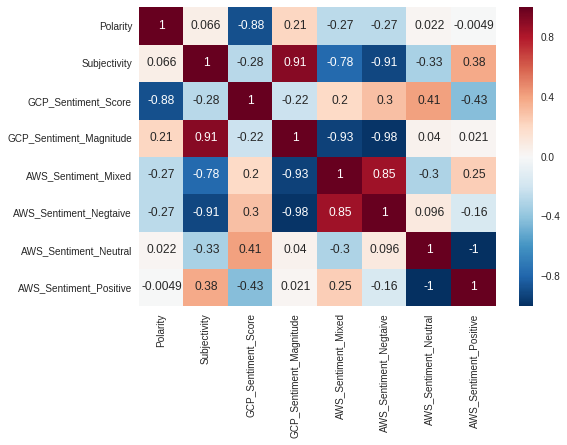

In [0]:
import seaborn as sns
sns.heatmap(df[['Polarity', 'Subjectivity', 'GCP_Sentiment_Score',
       'GCP_Sentiment_Magnitude', 'AWS_Sentiment_Mixed',
       'AWS_Sentiment_Negtaive', 'AWS_Sentiment_Neutral',
       'AWS_Sentiment_Positive']].head().corr(),annot=True)